# Import necessary Python Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
	

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loadindg the data set
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
#print first 5 rows of the dataset
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#Dropping the unnamed column
df.drop(columns = 'Unnamed: 0', inplace = True)

In [4]:
#checing datatypes of each column
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [5]:
#checking null values in dataset
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
#Checking duplicates
df.duplicated().sum()

0

In [7]:
#Exploring the count of each values in each column in the dataset
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of TV 

76.4     2
17.2     2
240.1    2
197.6    2
184.9    2
        ..
117.2    1
289.7    1
137.9    1
220.5    1
13.1     1
Name: TV, Length: 190, dtype: int64
*******************************************************
*******************************************************
Value counts of radio 

4.1     3
5.7     3
1.5     2
2.6     2
41.7    2
       ..
14.8    1
8.6     1
11.8    1
45.1    1
36.5    1
Name: radio, Length: 167, dtype: int64
*******************************************************
*******************************************************
Value counts of newspaper 

25.6    3
9.3     3
8.7     3
7.4     2
22.9    2
       ..
2.4     1
13.8    1
1.8     1
57.6    1
19.4    1
Name: newspaper, Length: 172, dtype: int64
*******************************************************
*******************************************************
Value counts of sales 

9.7     5
15.9    4
11.7    4
12.9    4
20.7    3
  

In [8]:
#Correlation between the columns
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

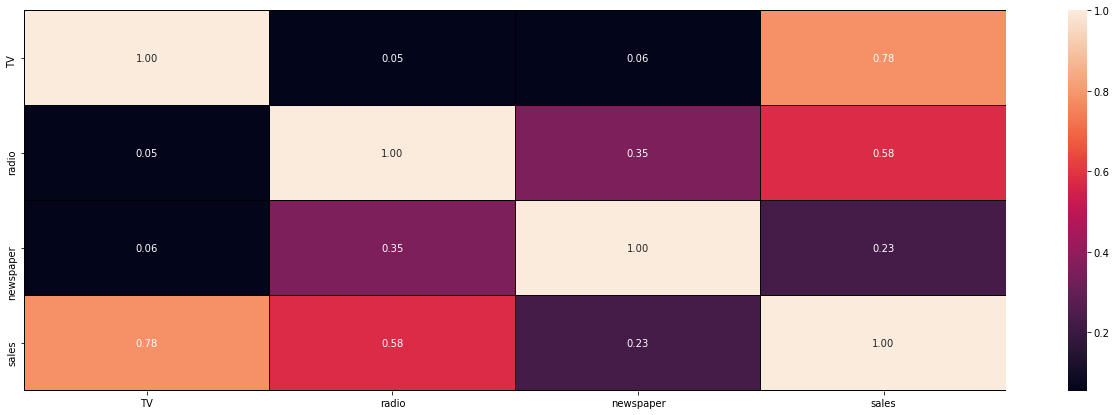

In [9]:
#Plotting the HEATMAP of Correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [10]:
#Correlation against the target column
corr_mat=np.abs(df.corr())
corr_mat['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

In [11]:
#VIF 
vif=pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif["features"]=df.columns
vif.sort_values(by=['VIF'], ascending=False)

,VIF,features
3,55.303920,sales
0,23.198876,TV
1,12.570312,radio
2,3.153498,newspaper


# DIVIDE DATA INTO FEATURES & LABEL

In [12]:
#Divide data set into features & label
y=df['sales']
X=df.drop(columns=['sales'])

# DATA VISUALISATION

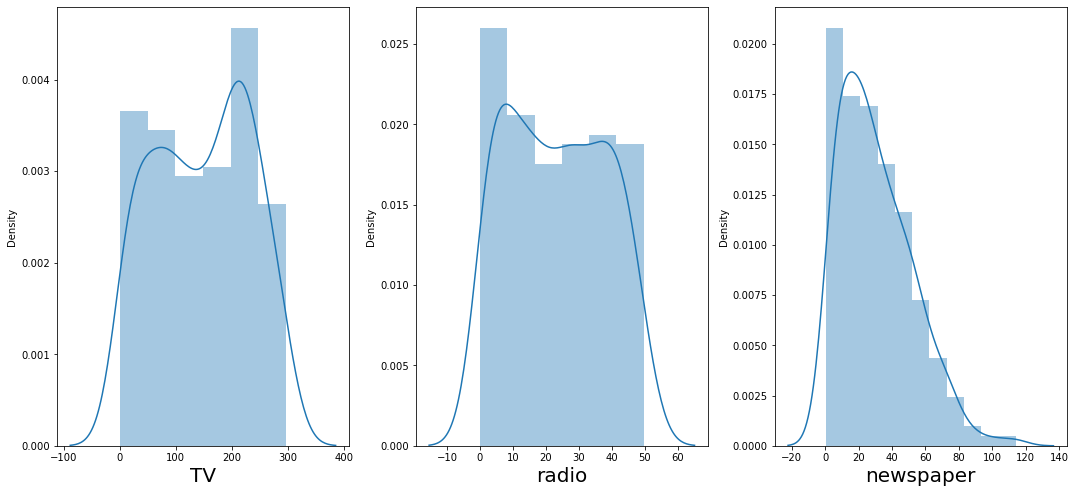

In [13]:
#Visualisation of the skewness using Distplot
plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [14]:
#skewness of each feature
X.skew().sort_values(ascending=False)

newspaper    0.894720
radio        0.094175
TV          -0.069853
dtype: float64

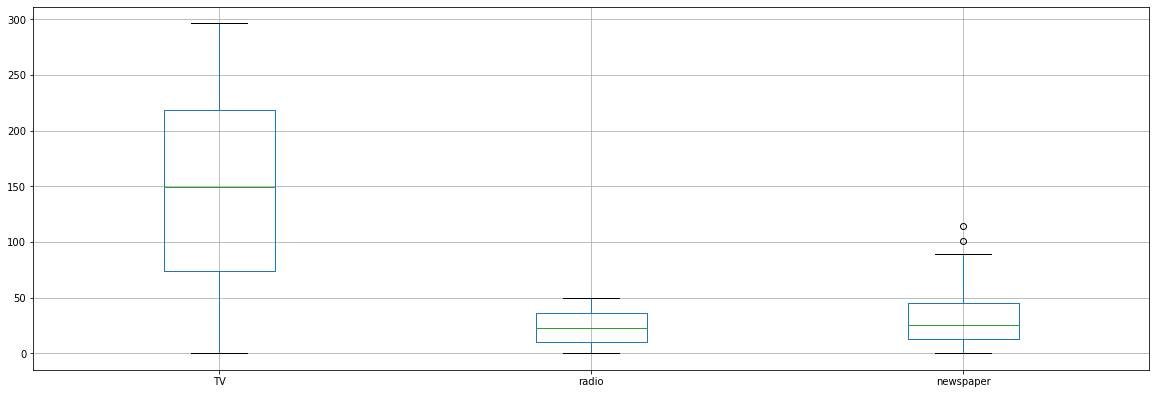

In [15]:
#Checking Outliers for each feature using BOXPLOT
X.boxplot(figsize=[20,8]) 
plt.subplots_adjust(bottom=0.25)
plt.show()

# REMOVING SKEWNESS & OUTLIERS FROM THE DATASET

In [16]:
#We can see skewness in our column, we will remove the skewness using power_transform function
from sklearn.preprocessing import power_transform
X_new = power_transform(X)
X=pd.DataFrame(X_new,columns=X.columns)
X.skew().sort_values(ascending=False) #validating that the skewness is removed

newspaper   -0.077942
radio       -0.242968
TV          -0.315199
dtype: float64

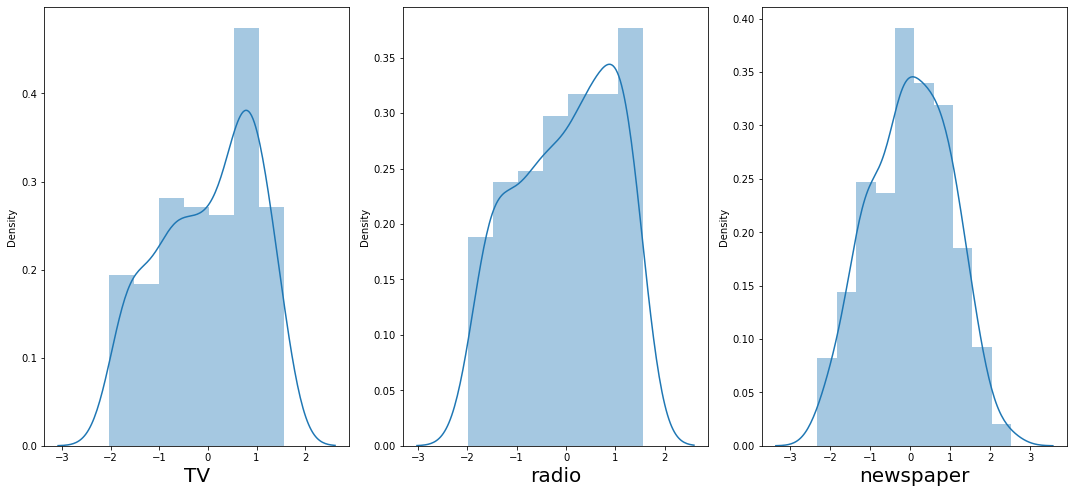

In [17]:
#Plotting transformed data's skewness using Distplot
plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

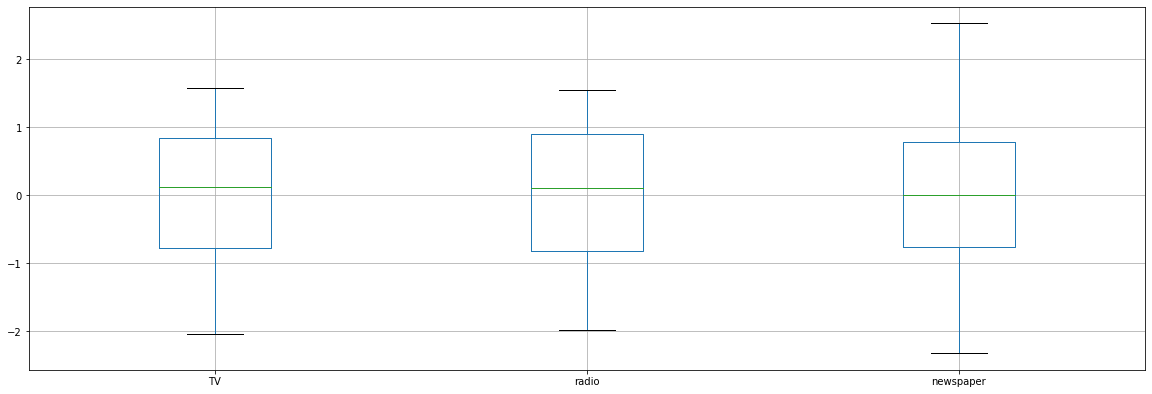

In [18]:
#Outliers for the transformed data using BOXPLOT
X.boxplot(figsize=[20,8]) 
plt.subplots_adjust(bottom=0.25)
plt.show()

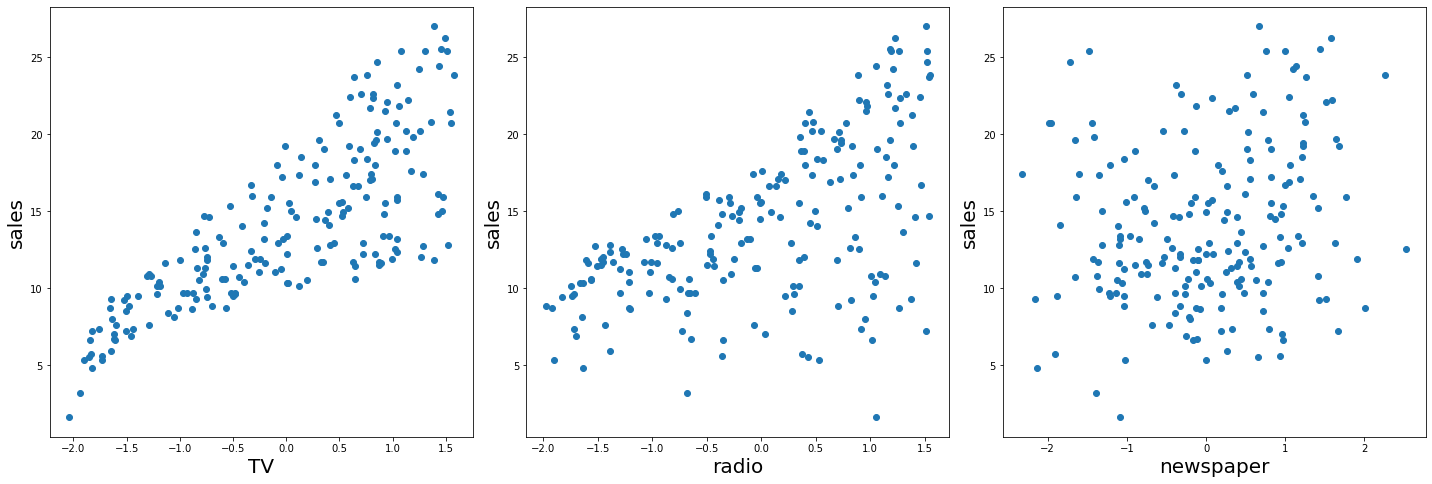

In [19]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=15: #double the features
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('sales', fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [20]:
#Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    y_pred_train=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,y_pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,y_pred)}")
    print("\n")

At random state 0,the training accuracy is:- 0.9129495390360743
At random state 0,the testing accuracy is:- 0.8838865502815021


At random state 1,the training accuracy is:- 0.9071938747219684
At random state 1,the testing accuracy is:- 0.8962223515318661


At random state 2,the training accuracy is:- 0.9183341288802332
At random state 2,the testing accuracy is:- 0.8134661880809734


At random state 3,the training accuracy is:- 0.9044922374546076
At random state 3,the testing accuracy is:- 0.9176823268482113


At random state 4,the training accuracy is:- 0.9058334490016562
At random state 4,the testing accuracy is:- 0.8999332568068062


At random state 5,the training accuracy is:- 0.9057996837685972
At random state 5,the testing accuracy is:- 0.9111155103873197


At random state 6,the training accuracy is:- 0.9031637800959937
At random state 6,the testing accuracy is:- 0.9263228920019166


At random state 7,the training accuracy is:- 0.9024328978288425
At random state 7,the testing acc

# TRAIN-TEST SPLIT

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=91)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred)*100)

90.54991771558714


# APPLYING REGRESSION MODELS & FINDING BEST FIT MODEL

In [25]:
#DECISION TREE REGRESSOR
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print("Score", r2_score(y_test,y_pred_dt)*100)

Score 95.69503861186959


In [26]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Score", r2_score(y_test,y_pred_rf)*100)

Score 97.81277301611867


In [27]:
#SVR
from sklearn.svm import SVR
svc = SVR()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
print("Score", r2_score(y_test,y_pred_svc)*100)

Score 90.93861426069704


In [28]:
#CROSS-VALIDATION OF THE MODEL
Train_accuracy=r2_score(y_train,y_pred_train)
Test_accuracy=r2_score(y_test,y_pred)

In [29]:
from sklearn.model_selection import  cross_val_score
cv_score=cross_val_score(lr,X,y,cv=5)
cv_mean=cv_score.mean()
print(f"At cross fold 5 the cv score is {cv_mean} and accuracy score for training is {Train_accuracy*100} and accuracy for testing is {Test_accuracy*100}")
print("\n")

At cross fold 5 the cv score is 0.8978060430607071 and accuracy score for training is -93.85042796685174 and accuracy for testing is 90.54991771558714




In [30]:
#Here, we have handled the problem of the overfitting and the underfitting by checking the training and testing score.

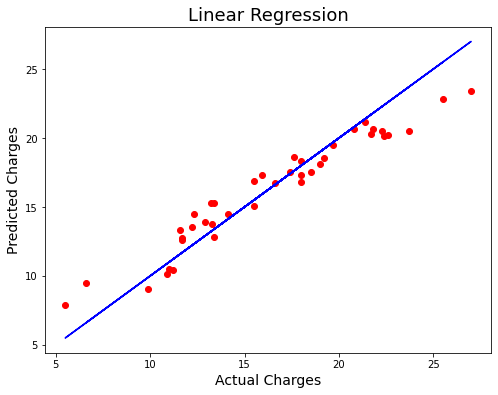

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [33]:
#Best fit line is covering most of the datapoints which shows good fit of our model

In [34]:
#REGULARIZATION
from sklearn.model_selection import GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [35]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001, .001, .01, .1, 1, 2, 4, 6, 8, 10], 'random_state': list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [36]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss
cv_score=cross_val_score(ls,X_scaled,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

89.76953107115393

# ENSEMBLE TECHNIQUE

In [38]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse','mae'], 'max_features':["auto","sqrt","log2"]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [39]:
rf = RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9965381100776778

In [40]:
y_pred=rf.predict(x_test)
rfs = r2_score(y_test,y_pred)
print("r2_score:",rfs*100)
rfscore = cross_val_score(rf,X_scaled,y,cv=5)
rfc=rfscore.mean()
print("Cross val score:",rfc*100)

r2_score: 97.90298132553278
Cross val score: 97.52247635284463


# SAVING THE MODEL

In [45]:
#SAVING THE MODEL IN PICKLE FORMAT
#PICKELING OF A FILE OR SERIALIZATION OF A FILE
#saving the model to the local file system
filename = 'abalone.pickle'
pickle.dump(rf, open(filename, 'wb'))